In [152]:
#Importez la librairie Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Chargez le fichier "Produits.xlsx" de données dans un objet appelé "data"
data = pd.read_excel('Produits.xlsx')

In [3]:
#Copiez data dans un autre object appelé df
df = data.copy()

In [4]:
#Affichez les informations concernant l'objet df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Nom        77 non-null     object 
 1   Categorie  77 non-null     object 
 2   Origine    77 non-null     object 
 3   Ville      77 non-null     object 
 4   Prix       77 non-null     float64
 5   Stock      77 non-null     int64  
 6   Valeur     77 non-null     float64
dtypes: float64(2), int64(1), object(4)
memory usage: 4.3+ KB


In [5]:
#Affichez les 10 premières lignes des données de l'objet df
df.head(10)

,Nom,Categorie,Origine,Ville,Prix,Stock,Valeur
0,Alice Mutton,Viandes,CEE,Lyon,195.00,0,0.0
1,Aniseed Syrup,Condiments,Exterieur,Paris,50.00,25,1250.0
2,Boston Crab Meat,Poissons et fruits de mer,Exterieur,Paris,92.00,30,2760.0
3,Camembert Pierrot,Produits laitiers,Exterieur,Paris,170.00,0,0.0
4,Carnarvon Tigers,Poissons et fruits de mer,Exterieur,Lyon,312.50,0,0.0
5,Chai,Boissons,CEE,Lyon,90.00,10,900.0
6,Chang,Boissons,Exterieur,Lyon,95.00,25,2375.0
7,Chartreuse verte,Boissons,Exterieur,Lyon,90.00,5,450.0
8,Chef Antons Cajun Seasoning,Condiments,CEE,Lyon,110.00,0,0.0
9,Chef Antons Gumbo Mix,Condiments,CEE,Paris,106.75,0,0.0


In [14]:
#Supprimer la colonne "Valeur"
df.drop(columns='Valeur', inplace=True)

In [15]:
#Afficher les statistiques descriptives pour les variables quantitatives de l'objet df
df.describe(exclude='object')

,Prix,Stock
count,77.000000,77.000000
mean,144.331818,12.467532
std,169.075557,10.931105
min,12.500000,0.000000
25%,66.250000,0.000000
50%,97.500000,10.000000
75%,166.250000,25.000000
max,1317.500000,30.000000


In [16]:
#Afficher les statistiques descriptives pour les variables qualitatives de l'objet df
df.describe(exclude=('int64', 'float64'))

,Nom,Categorie,Origine,Ville
count,77,77,77,77
unique,77,8,2,2
top,Alice Mutton,Desserts,CEE,Lyon
freq,1,13,40,40


In [17]:
#On veut afficher les produits dont la catégorie = boissons
df[df['Categorie']=='Boissons']

,Nom,Categorie,Origine,Ville,Prix,Stock
5,Chai,Boissons,CEE,Lyon,90.00,10
6,Chang,Boissons,Exterieur,Lyon,95.00,25
7,Chartreuse verte,Boissons,Exterieur,Lyon,90.00,5
11,Côte de Blaye,Boissons,CEE,Paris,1317.50,15
21,Guarana Fantastica,Boissons,Exterieur,Lyon,22.50,0
28,Ipoh Coffee,Boissons,Exterieur,Paris,230.00,25
31,Lakkalikoori,Boissons,CEE,Lyon,90.00,20
32,Laughing Lumberjack Lager,Boissons,CEE,Lyon,70.00,10
45,Outback Lager,Boissons,Exterieur,Lyon,75.00,30
53,Rhonbrau Klosterbier,Boissons,CEE,Paris,38.75,25


In [35]:
#On veut afficher les produits dont la Catégorie = boissons et le prix >100
df.loc[(df['Categorie']=='Boissons') & (df['Prix']>100), ['Categorie', 'Prix']]

,Categorie,Prix
11,Boissons,1317.5
28,Boissons,230.0


In [37]:
#On veut afficher les produits dont la Catégorie = boissons et l'origine=CEE et prix > 100
df.loc[(df['Categorie']=='Boissons') & (df['Prix']>100) & (df['Origine']=='CEE'), ['Categorie', 'Origine', 'Prix']]

,Categorie,Origine,Prix
11,Boissons,CEE,1317.5


In [40]:
#On veut afficher les produits dont la (Catégorie = boissons et origine = CEE) OU (catégorie = condiment)
df.loc[((df['Categorie']=='Boissons') & (df['Origine']=='CEE')) | (df['Categorie']=='Condiments') , ['Categorie', 'Origine']]

,Categorie,Origine
1,Condiments,Exterieur
5,Boissons,CEE
8,Condiments,CEE
9,Condiments,CEE
11,Boissons,CEE
16,Condiments,CEE
19,Condiments,Exterieur
23,Condiments,CEE
31,Boissons,CEE
32,Boissons,CEE


In [42]:
#On veut afficher les produits dont (Catégorie = viande ET origine = CEE) OU (catégorie = condiment ET origine = extérieur)
df.loc[((df['Categorie']=='Viandes') & (df['Origine']=='CEE')) | ((df['Categorie']=='Condiments') & (df['Origine']=='Exterieur')) , ['Categorie', 'Origine']]

,Categorie,Origine
0,Viandes,CEE
1,Condiments,Exterieur
19,Condiments,Exterieur
39,Viandes,CEE
42,Condiments,Exterieur
44,Condiments,Exterieur
46,Viandes,CEE
48,Viandes,CEE
63,Condiments,Exterieur
70,Viandes,CEE


In [44]:
#On veut afficher les produits dont le prix > 70 et prix <=100
df.loc[((df['Prix']> 70) & (df['Prix']<=100)), ['Prix']]

,Prix
2,92.00
5,90.00
6,95.00
7,90.00
16,77.50
23,97.25
27,95.00
31,90.00
35,85.00
38,100.00


In [50]:
#Lister les aliments dont le prix est compris entre 100 et 200, et qui sont des « viandes »
df.loc[(df['Prix']<200) & (df['Prix']>100) & (df['Categorie']=='Viandes'), ['Prix', 'Categorie']]

,Prix,Categorie
0,195.0,Viandes
46,120.0,Viandes
48,164.0,Viandes


In [75]:
#Lister les 15 produits les moins chers
df.sort_values(by='Prix', ascending=True).head(15)

,Nom,Categorie,Origine,Ville,Prix,Stock
15,Geitost,Produits laitiers,CEE,Lyon,12.50,20
21,Guarana Fantastica,Boissons,Exterieur,Lyon,22.50,0
30,Konbu,Poissons et fruits de mer,CEE,Lyon,30.00,5
13,Filo Mix,Pates et cereales,Exterieur,Paris,35.00,25
70,Tourtiere,Viandes,CEE,Paris,37.25,10
53,Rhonbrau Klosterbier,Boissons,CEE,Paris,38.75,25
71,Tunnbrod,Pates et cereales,CEE,Paris,45.00,25
67,Teatime Chocolate Biscuits,Desserts,Exterieur,Lyon,46.00,5
55,Røgede sild,Poissons et fruits de mer,Exterieur,Paris,47.50,15
76,Zaanse koeken,Desserts,Exterieur,Lyon,47.50,0


In [112]:
#Calculer la moyenne de prix des boissons distribuées à Lyon (pivot_table)
df.pivot_table(index='Ville', columns='Categorie', values='Prix', aggfunc='mean')

Categorie,Boissons,Condiments,Desserts,Pates et cereales,Poissons et fruits de mer,Produits laitiers,Produits secs,Viandes
Ville,,,,,,,,
Lyon,76.944444,125.00000,119.750000,142.083333,118.366667,103.3,143.75,354.7375
Paris,528.750000,110.46875,130.985714,70.625000,88.458333,184.0,189.00,100.6250


In [90]:
#Quels sont les 5 produits les moins chers vendus à Lyon ?
df.loc[(df['Ville']=='Lyon'), :].sort_values('Prix').head(5)

,Nom,Categorie,Origine,Ville,Prix,Stock
15,Geitost,Produits laitiers,CEE,Lyon,12.5,20
21,Guarana Fantastica,Boissons,Exterieur,Lyon,22.5,0
30,Konbu,Poissons et fruits de mer,CEE,Lyon,30.0,5
67,Teatime Chocolate Biscuits,Desserts,Exterieur,Lyon,46.0,5
76,Zaanse koeken,Desserts,Exterieur,Lyon,47.5,0


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Nom        77 non-null     object 
 1   Categorie  77 non-null     object 
 2   Origine    77 non-null     object 
 3   Ville      77 non-null     object 
 4   Prix       77 non-null     float64
 5   Stock      77 non-null     int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 3.7+ KB


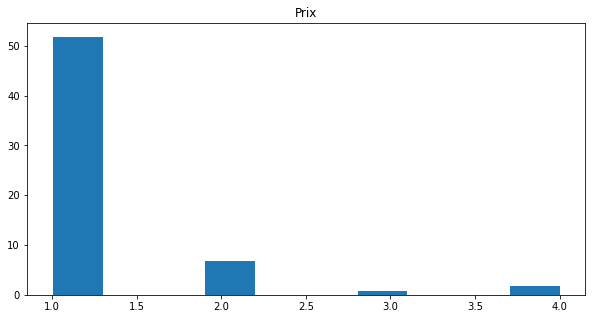

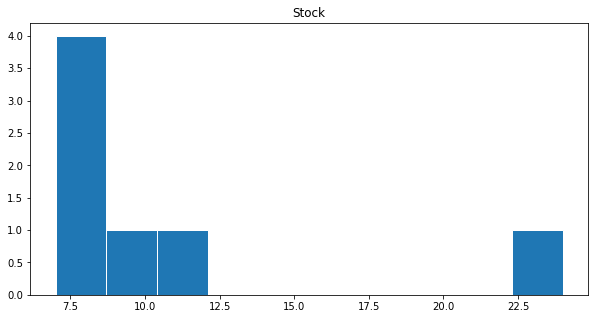

In [145]:
#En utilisant une boucle, afficher la representation graphique de toutes les variables quantitatives
var_quant = df.select_dtypes(include = ['int','float']).columns
var_quant

for i in var_quant :
    plt.figure (figsize = (10,5))
    plt.hist(df[i].value_counts(), edgecolor='w')
    plt.title(i)


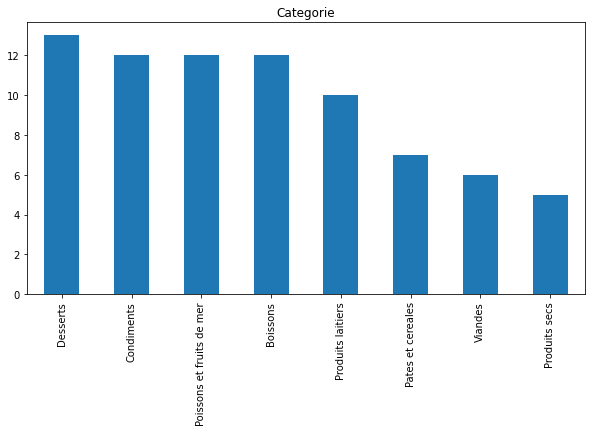

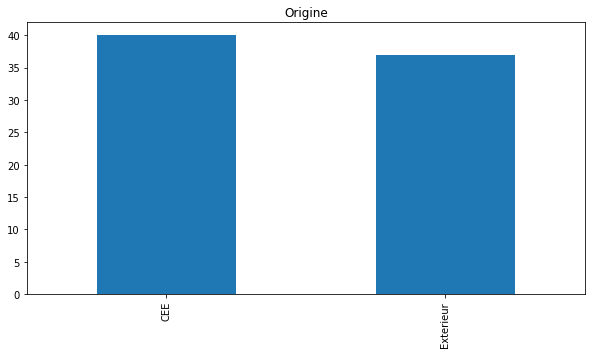

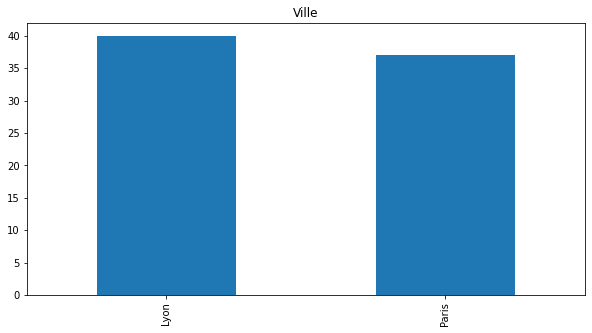

In [153]:
#En utilisant une boucle, afficher la representation graphique de toutes les variables qualitatives
var_qual = df.select_dtypes(include = ['object']).columns
for i in var_qual[1:] :
    plt.figure (figsize = (10,5))
    df[i].value_counts().plot(kind='bar')
    plt.title(i)